<a href="https://colab.research.google.com/github/michelmartinss/Clustering_metricas_RFM/blob/main/Clustering_Metricas_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploração de dados
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Modelo para dividir divisão da base de dados em treino e teste
from sklearn.model_selection import train_test_split

# Processo de tratamento dos dados categóricos e numéricos
from sklearn.preprocessing import MinMaxScaler

## -- Machine learning -- ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

# Métricas para valaiação do modelo
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, ConfusionMatrixDisplay

In [ ]:
# Remove os avisos de atualização das bilbiotecas
import warnings
warnings.filterwarnings('ignore')

#### 1 - Análise exploratória dos dados

In [ ]:
# Carregar o Arquivo
df = pd.read_csv('/content/data.csv', sep=',', encoding='ISO-8859-1')

In [ ]:
# Visualizar os 5 primeiros registros das tabelas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Descrição estatística dos dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Resumo do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


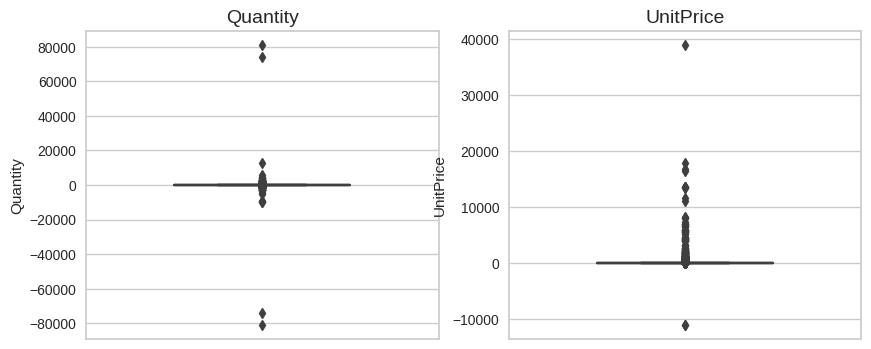

In [ ]:
# Visualizar a distribuição dos dados

plt.figure(figsize=(10, 4))

# Boxplot para Quantity
sns.boxplot(y='Quantity', data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 1))
plt.title('Quantity', fontsize=14)

# Boxplot para UnitPrice
sns.boxplot(y="UnitPrice", data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 2))
plt.title('UnitPrice', fontsize=14)

# Mostrando o gráfico
plt.show()

In [ ]:
# É possível identificar que há registros negativos (menor que 0), bem como outliers nas variáveis Quantity e UniPrice

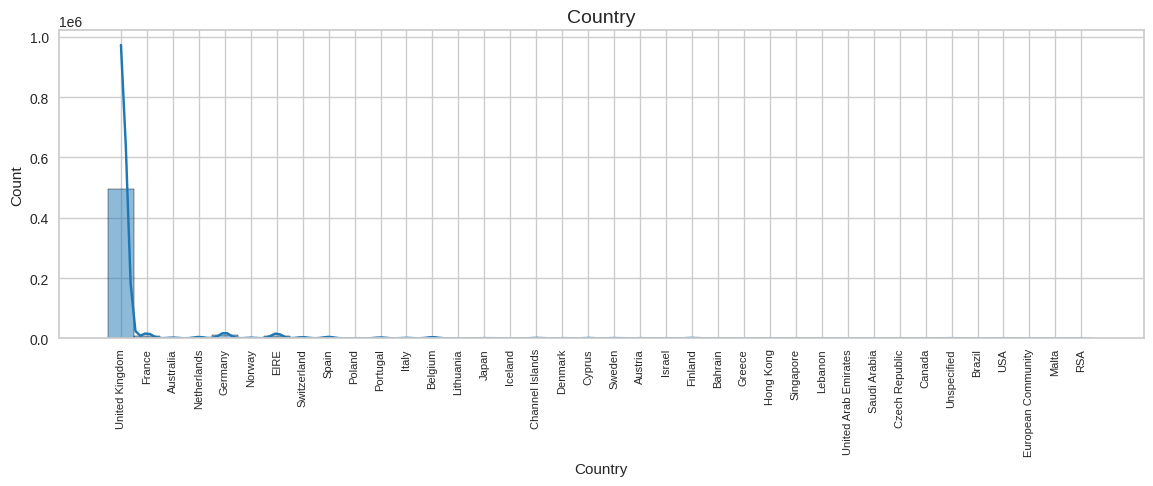

In [ ]:
# Plotando Histograma
plt.figure(figsize=(14, 4))

# Histograma da coluna 'Country'
sns.histplot(data=df, x='Country', stat="count", kde=True, bins=15, color='#1f77b4')
plt.title('Country', fontsize=14)
plt.xticks(rotation=90, size='8')

plt.show()


In [ ]:
# os clientes se concentram em United Kingdom. Foi identificado um registro Unspecified, que representa a ausencia de nome do País.

In [ ]:
df[df['Country'] == 'Unspecified']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,11/24/2011 14:55,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,11/24/2011 14:55,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,11/24/2011 14:55,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,11/24/2011 14:55,0.55,NaN,Unspecified


In [ ]:
# Removendo os registros Unspecified da coluna 'Country'

df = df[df['Country']!="Unspecified"]
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Identificando valores nulos
(
    df.isna().sum()
    .to_frame("Valores_nulos")
    .assign(missing_pct=lambda x: (x.div(len(df)) * 100).round(2))
    .sort_values("Valores_nulos", ascending=False)
)

,Valores_nulos,missing_pct
CustomerID,134878,24.91
Description,1454,0.27
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


In [ ]:
# Checando se há registros duplicados
df.duplicated().any()

True

In [ ]:
# Analisando a relação de registros duplicados
(df.
groupby(df.columns.tolist(), dropna=False)
.size()
.to_frame('n_duplicates')
.query('n_duplicates >1')
.sort_values('n_duplicates',ascending=False).head()
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

### 2 - Pré-processamento dos dados

In [ ]:
# Removendo os valores nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406585 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406585 non-null  object 
 1   StockCode    406585 non-null  object 
 2   Description  406585 non-null  object 
 3   Quantity     406585 non-null  int64  
 4   InvoiceDate  406585 non-null  object 
 5   UnitPrice    406585 non-null  float64
 6   CustomerID   406585 non-null  float64
 7   Country      406585 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Checando se há registros igual ou menor que zero em 'UnitPrice'
from typing import Counter
Counter(df[df['UnitPrice'] <=0 | df['UnitPrice'].isnull()].count())

Counter({40: 8})

In [ ]:
# Aplicando filtro no dataframe para considerar somente os registros acima de 0
df = df[df['UnitPrice'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406545 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406545 non-null  object 
 1   StockCode    406545 non-null  object 
 2   Description  406545 non-null  object 
 3   Quantity     406545 non-null  int64  
 4   InvoiceDate  406545 non-null  object 
 5   UnitPrice    406545 non-null  float64
 6   CustomerID   406545 non-null  float64
 7   Country      406545 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Checando se há registros igual ou menor que zero em 'Quantity'
Counter(df[df['Quantity'] <=0 | df['Quantity'].isnull()].count())

Counter({8905: 8})

In [ ]:
# Aplicando filtro no dataframe para considerar somente os registros acima de 0
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397640 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397640 non-null  object 
 1   StockCode    397640 non-null  object 
 2   Description  397640 non-null  object 
 3   Quantity     397640 non-null  int64  
 4   InvoiceDate  397640 non-null  object 
 5   UnitPrice    397640 non-null  float64
 6   CustomerID   397640 non-null  float64
 7   Country      397640 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
# Levantando a quantidade de registros duplicados
df.duplicated().sum()

5189

In [ ]:
# Remover valores duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Checando a remoção de registros duplicados
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392451 non-null  object 
 1   StockCode    392451 non-null  object 
 2   Description  392451 non-null  object 
 3   Quantity     392451 non-null  int64  
 4   InvoiceDate  392451 non-null  object 
 5   UnitPrice    392451 non-null  float64
 6   CustomerID   392451 non-null  float64
 7   Country      392451 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.9+ MB


In [ ]:
# Avaliando o tipo de dados nas respectivas colunas
df[['CustomerID','InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   392451 non-null  float64
 1   InvoiceDate  392451 non-null  object 
dtypes: float64(1), object(1)
memory usage: 9.0+ MB


In [ ]:
# Transformando o type'CustomerID' para inteiro
df[['CustomerID']] = df[['CustomerID']].astype(int)

In [ ]:
# Transformando o type'InvoiceDate' para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Checando o dtype
df[['CustomerID','InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392451 non-null  int64         
 1   InvoiceDate  392451 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 MB


In [ ]:
# Aplicando filtro para 'Quantity' até 10000, removendo os outliers acima de 10.000
df = df[df['Quantity'] <= 10000]

In [ ]:
# Aplicando filtro para 'UnitPrice' até 5000, removendo os outliers acima de 5.000
df = df[df['UnitPrice'] <= 5000]

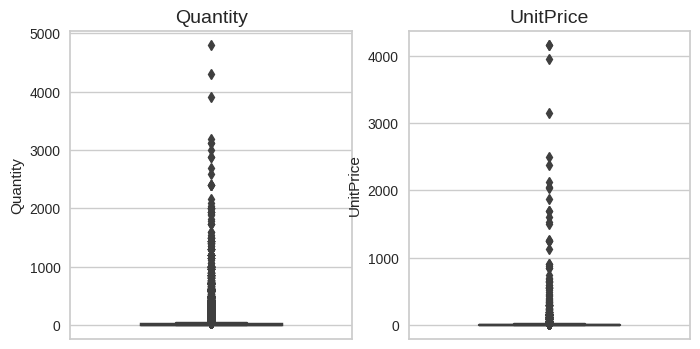

In [ ]:
# Checando a remoção dos outliers das respectivas colunas: 'Quantity' e 'UnitPrice'

# Plotando os boxplots
plt.figure(figsize=(8, 4))

# Boxplot para Quantity
sns.boxplot(y='Quantity', data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 1))
plt.title('Quantity', fontsize=14)

# Boxplot para UnitPrice
sns.boxplot(y="UnitPrice", data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 2))
plt.title('UnitPrice', fontsize=14)

# Mostrando o gráfico
plt.show()

In [ ]:
# Criando uma nova coluna, com o valor total da compra, multiplicando a 'Quantity' pelo 'UnitPrice'
df['TotalCompra'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Configurando a data para ano - mes - dia
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

# Criando uma nova coluna com a data da última compra, para cálculo da recência.
df['DataUltimaCompra'] = df['InvoiceDate'].max()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra,DataUltimaCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09


#### Cálculo do RFM
R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente.

F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;

M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
# Calaculando o RFM através de um groupby e validando valores, usanso uma sintaxe mais enxuta
data_atual = df['DataUltimaCompra'].max()

rfm = df.groupby('InvoiceNo').agg(
    Recencia=('InvoiceDate', lambda dates: (data_atual - dates.max()).days),
    Frequencia=('InvoiceDate', 'size'),
    TicketMedio=('TotalCompra', 'mean')
).reset_index()

rfm.head()

,InvoiceNo,Recencia,Frequencia,TicketMedio
0,536365,373,7,19.874286
1,536366,373,2,11.100000
2,536367,373,12,23.227500
3,536368,373,4,17.512500
4,536369,373,1,17.850000


In [ ]:
# Colunas que você quer incluir no gráfico de caixa
columns_to_plot = ['Recencia', 'Frequencia', 'TicketMedio']

# Criar um gráfico de caixa usando Plotly para as colunas desejadas
fig = go.Figure()

# Adicionar traces para cada coluna desejada
for column in columns_to_plot:
    fig.add_trace(go.Box(y=rfm[column], name=column))

# Personalizar layout
fig.update_layout(
    title='Gráfico de Caixa para RFM',
    yaxis_title='Valor',
)

fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white')

# Exibir o gráfico interativo
fig.show()

In [ ]:
rfm = rfm[rfm['TicketMedio'] < 6000]

In [ ]:
# Checando a remoção dos outliers na variável TicketMedio

# Colunas que você quer incluir no gráfico de caixa
columns_to_plot = ['Recencia', 'Frequencia', 'TicketMedio']

# Criar um gráfico de caixa usando Plotly para as colunas desejadas
fig = go.Figure()

# Adicionar traces para cada coluna desejada
for column in columns_to_plot:
    fig.add_trace(go.Box(y=rfm[column], name=column))

# Personalizar layout
fig.update_layout(
    title='Gráfico de Caixa para RFM',
    yaxis_title='Valor')

fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white')

# Exibir o gráfico interativo
fig.show()

In [ ]:
# Avaliando se há correlação entre as variáveis
correlation_matrix = rfm[['Recencia', 'Frequencia', 'TicketMedio']].corr()
correlation_matrix

,Recencia,Frequencia,TicketMedio
Recencia,1.000000,-0.070224,0.002880
Frequencia,-0.070224,1.000000,-0.147283
TicketMedio,0.002880,-0.147283,1.000000


In [ ]:
# Não há nehuma correlação

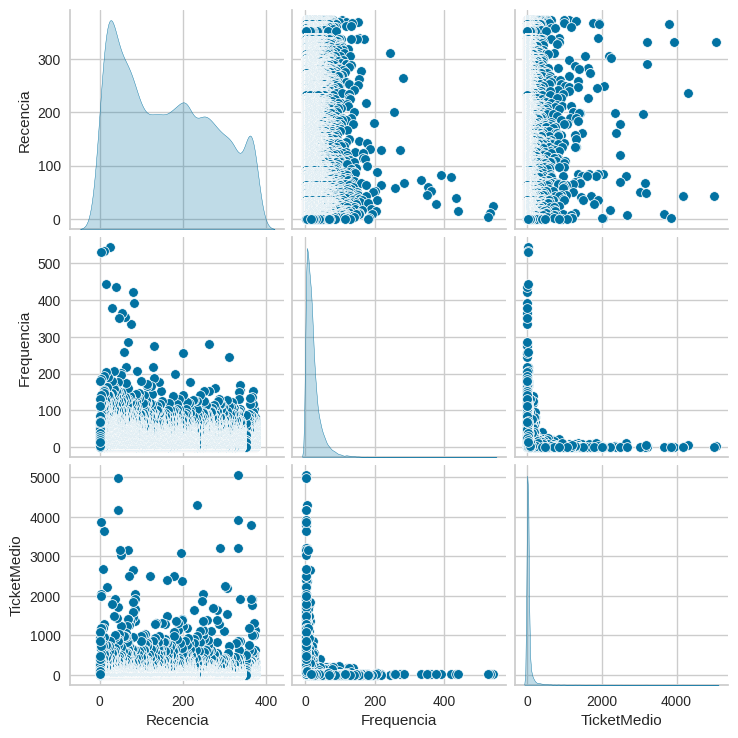

In [ ]:
# Visualizando a distribuição
sns.pairplot(rfm, diag_kind='kde')
plt.show()

### 3 - Selecionando um algoritmos de clusterização



#### Optei pelo uso K-Means, por causa das características do algoritmo: simplicidade e facilidade de entendimento, tornando a implementação direta; além de sua eficiência, sendo rápido e escalável para lidar com grandes conjuntos de dados, como uma abordagem acessível e eficaz para atingir os objetivos propostos.

In [ ]:
# Definindo X para aplicar o modelo K-means para clusterização das respectivas variáveis
# Selecionar as features
X = rfm[['Recencia', 'Frequencia', 'TicketMedio']]

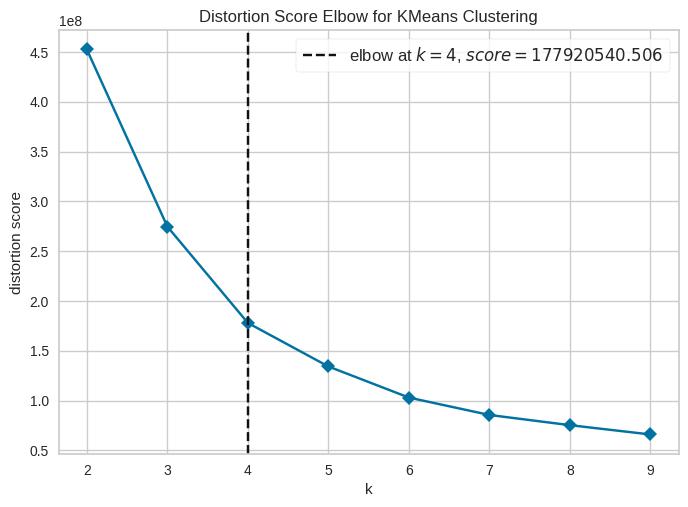

In [ ]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=9, timings=False);

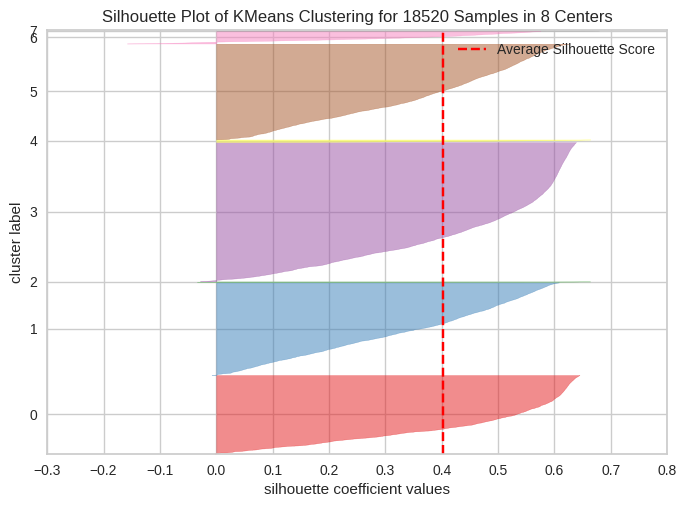

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18520 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans())

In [ ]:
silhouette_visualizer(KMeans(), X)

In [ ]:
# Número de clusters
n_clusters = 4

# Aplique o algoritmo K-Means ao conjunto de dados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Realiza a clusterização dos dados
y_pred = kmeans.predict(X)

In [ ]:
# Adiciona a coluna de rótulo de cluster ao DataFrame
rfm['cluster'] = y_pred

### 4 - Analise os clusters obtidos

In [ ]:
# Contando os registros por clusters
rfm.cluster.value_counts().sort_index()

0    9811
1      37
2    8395
3     277
Name: cluster, dtype: int64

In [ ]:
# Avaliar os valores de cada cluster

aggregation = {
    'Recencia': ['min', 'max', 'mean', 'count'],
    'Frequencia': ['min', 'max', 'mean', 'count'],
    'TicketMedio': ['min', 'max', 'mean', 'count']}

cluster = rfm.groupby('cluster').agg(aggregation).reset_index()
cluster

cluster Recencia                        Frequencia                        \
               min  max        mean count        min  max       mean count   
0       0        0  169   69.931404  9811          1  542  23.111304  9811   
1       1        2  367  154.378378    37          1   12   2.378378    37   
2       2      168  373  267.323764  8395          1  281  19.627397  8395   
3       3        0  373  154.671480   277          1   25   3.039711   277   

  TicketMedio                                  
          min          max         mean count  
0        0.38   399.600000    33.275822  9811  
1     1790.00  5053.633333  2816.744767    37  
2        0.55   409.139512    35.453340  8395  
3      389.68  1765.054444   753.675014   277

In [ ]:
rfm.describe()

,Recencia,Frequencia,TicketMedio,cluster
count,18520.000000,18520.000000,18520.000000,18520.000000
mean,160.844276,21.190443,50.598672,0.953456
std,112.747398,24.348676,169.630589,1.020178
min,0.000000,1.000000,0.380000,0.000000
25%,58.000000,6.000000,12.752700,0.000000
50%,150.000000,15.000000,18.746464,0.000000
75%,254.000000,27.000000,32.380597,2.000000
max,373.000000,542.000000,5053.633333,3.000000


In [ ]:
# Cria o gráfico de barras para visualizar o tamanho de cada cluster

cluster_counts = rfm['cluster'].value_counts().reset_index()

# Renomeie as colunas para o gráfico
cluster_counts.columns = ['Cluster', 'Contagem']

# Crie uma lista de cores personalizadas para cada cluster
colors = ['blue']

# Adicione rótulos com base nos valores da coluna 'Contagem'
cluster_counts['Rótulo'] = cluster_counts['Contagem'].astype(str)

# Crie o gráfico de barras com rótulos
fig = px.bar(cluster_counts, x='Cluster', y='Contagem', title='Gráfico de Barras por Cluster',
              color_discrete_sequence=colors, text='Rótulo', width=1100, height=500,)

fig.update_traces(texttemplate='%{text}', textposition='outside')

# Personalize a cor de fundo e da linha de eixo
fig.update_layout(
    plot_bgcolor='white',  # Define a cor de fundo para branco
    xaxis=dict(showline=True, showgrid=False, linecolor='black'),
    yaxis=dict(showline=True, showgrid=False, linecolor='black'),
)

fig.show()

In [ ]:
# Criar uma lista de cores com base no número de clusters
colors = ['#F22D1B', '#042940', '#BF4141', '#BF6A1F', '#F2C9C9', 'orange', 'pink', 'magenta']  # Adicione mais cores, se necessário

# Adicione a coluna 'cluster' que contém os rótulos dos clusters atribuídos pelo K-means
X['cluster'] = rfm['cluster']

# Criar uma figura 3D personalizada
fig = go.Figure()

# Iterar sobre cada cluster e adicionar um trace ao gráfico
for cluster in X['cluster'].unique():
    cluster_data = X[X['cluster'] == cluster]

    fig.add_trace(go.Scatter3d(
        x=cluster_data['Recencia'],
        y=cluster_data['TicketMedio'],
        z=cluster_data['Frequencia'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker=dict(
            size=5,
            opacity=0.7,
            line=dict(width=0),
            color=colors[cluster % len(colors)]
            ),
        text=[f'Recencia: {rec}, Frequencia: {freq}, TicketMedio: {ticket}' for rec, freq, ticket in
              zip(cluster_data['Recencia'], cluster_data['Frequencia'], cluster_data['TicketMedio'])]))

# Personalizar o layout do gráfico 3D
fig.update_layout(
    title='Gráfico 3D de Clusters',
    scene=dict(
        xaxis_title='Recencia',
        yaxis_title='Frequencia',
        zaxis_title='TicketMedio'))

# Exibir o gráfico interativo
fig.show()
fig.write_html("Grafico_3D_cluster.html")

### 5 - Interpretação dos resultados obtidos

####   
a. Descreva o perfil de compras dos clientes de cada cluster:  

Cluster 0: Este cluster consiste em clientes com recência mínima de 0 a máxima de 169, frequência variando de 1 a 542, e um ticket médio entre 0.38 e 399.60. Em média, esses clientes apresentam uma recência de aproximadamente 69.93, realizam compras frequentes com uma média de 23.11 transações e têm um ticket médio médio de 33.28. Podem ser considerados clientes ativos e leais, com um comportamento consistente de compra.  

Cluster 1: Caracterizado por clientes com recência entre 2 e 367, frequência variando de 1 a 12, e um ticket médio entre 1790.00 e 5053.63. Em média, esses clientes têm uma recência de 154.38, realizam compras menos frequentes (média de 2.38 transações) e apresentam um ticket médio médio elevado de 2816.74. Esse cluster representa clientes que podem preferir fazer compras mais significativas, embora com menor frequência.

Cluster 2: Esse cluster inclui clientes com recência entre 168 e 373, frequência variando de 1 a 281, e um ticket médio entre 0.55 e 409.14. Em média, esses clientes têm uma recência de 267.32, realizam compras com uma frequência média de 19.63 transações e têm um ticket médio médio de 35.45. Parecem ser clientes regulares, com uma boa frequência de compras e um ticket médio moderado.

Cluster 3: Caracterizado por clientes com recência mínima a 373, frequência variando de 1 a 25, e um ticket médio entre 389.68 e 1765.05. Em média, esses clientes têm uma recência de 154.67, realizam compras com uma frequência média de 3.04 transações e apresentam um ticket médio médio de 753.68. Este cluster representa clientes com uma frequência moderada de compras e um ticket médio mais elevado.

b. Justifique como essa análise pode ser útil para a empresa para segmentação de seus clientes e personalização das campanhas de marketing:  

A análise dos clusters oferece à empresa uma visão aprofundada do comportamento de compra de diferentes segmentos de clientes, permitindo estratégias mais eficazes de segmentação e personalização das campanhas de marketing.

Segmentação de Clientes: A empresa pode direcionar estratégias específicas para cada cluster com base em suas características distintas. Por exemplo, concentrar esforços de retenção nos clientes do Cluster 0, oferecer ofertas exclusivas para os clientes do Cluster 1 e implementar programas de fidelidade para os clientes do Cluster 2.

Personalização de Campanhas de Marketing: Compreender o comportamento de compra de cada cluster permite personalizar as mensagens de marketing. Por exemplo, oferecer descontos mais significativos para clientes do Cluster 1 em compras menos frequentes ou criar campanhas de cross-selling para clientes do Cluster 3 com ticket médio mais elevado.

c. Sugira ações possíveis com base nas análises realizadas:  

Cluster 0 (Clientes Ativos e Leais):
Ação: Reforçar a lealdade com programas de recompensas exclusivos, oferecer descontos para compras frequentes e personalizar comunicações para manter o engajamento.  

Cluster 1 (Compras Menos Frequentes, Ticket Médio Elevado):
Ação: Criar campanhas promocionais para incentivar compras mais frequentes, oferecer descontos progressivos e personalizar ofertas com base em padrões de compras anteriores.  

Cluster 2 (Clientes Regulares, Ticket Médio Moderado):
Ação: Reforçar a relação com campanhas de fidelidade, oferecer incentivos para compras adicionais e personalizar recomendações de produtos com base no histórico de compras.  

Cluster 3 (Frequência Moderada, Ticket Médio Elevado):  

Ação: Criar ofertas exclusivas para produtos premium, incentivar compras mais frequentes com programas de lealdade e proporcionar experiências personalizadas para manter a satisfação do cliente.
Essas sugestões são estratégias iniciais que podem ser refinadas com base na resposta do cliente e nos objetivos específicos da empresa.

In [ ]:
# Michel Martins da Silva